In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip 'drive/MyDrive/color.zip' -d 'drive/MyDrive/'

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11030437-942c-4cb4-a40e-b35236778a4b___UF.GRC_YLCV_Lab 02923.JPG  
  inflating: drive/MyDrive/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1104914f-f715-4b02-b551-5cdf03f54bcb___YLCV_NREC 2717.JPG  
  inflating: drive/MyDrive/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11061195-ce9c-4171-819d-663342a186e8___YLCV_NREC 0257.JPG  
  inflating: drive/MyDrive/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/110c50e6-039e-4f32-bda1-26262968ab8a___YLCV_GCREC 5539.JPG  
  inflating: drive/MyDrive/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1114e83e-5477-483c-8bed-847b2c169c9f___YLCV_NREC 2257.JPG  
  inflating: drive/MyDrive/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/111d4096-e9eb-4f32-9a25-f3c19b92c627___YLCV_GCREC 2209.JPG  
  inflating: drive/MyDrive/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1126f296-0c84-4f9d-b66b-1e9a91794ec9___UF.GRC_YLCV_Lab 09340.JPG  
  inflati

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential,Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.5.0
Hub version: 0.12.0
GPU available (YESS!!!!)


In [5]:
!pip install split-folders

In [6]:
import splitfolders

In [8]:
input = 'drive/MyDrive/color/'
output = 'drive/MyDrive/plants_disease_dataset'
splitfolders.ratio(input,output,seed = 222, ratio = (0.6,0.2,0.2))

Copying files: 223 files [00:03, 73.05 files/s]

KeyboardInterrupt: ignored

In [122]:
img_width, img_height = (224,224)
batch_size = 32
train_data_directory = "drive/MyDrive/plants_disease_dataset/train/"
val_data_directory = "drive/MyDrive/plants_disease_dataset/val"
test_data_directory = "drive/MyDrive/plants_disease_dataset/test/"

In [126]:
names = []
images = []
for i in os.listdir(train_data_directory):
    for image_filename in os.listdir(train_data_directory + i):
        names.append(i) # name
        images.append(i + '/' + image_filename) # image

In [216]:
test_labels = []
test_images = []
for i in os.listdir(test_data_directory):
    for image_filename in os.listdir(test_data_directory + i):
        test_labels.append(i) # name
        test_images.append(i + '/' + image_filename) # image

In [127]:
train_pics = pd.DataFrame({'Labels':names,'Images':images})
train_pics

Labels                                             Images
0                          Apple___Apple_scab  Apple___Apple_scab/be10c6a0-b99b-4c91-b78f-141...
1                          Apple___Apple_scab  Apple___Apple_scab/4495850d-4478-4680-a657-c08...
2                          Apple___Apple_scab  Apple___Apple_scab/af598e54-dae1-47e5-aefc-0b0...
3                          Apple___Apple_scab  Apple___Apple_scab/85aad925-f1e2-463e-840b-266...
4                          Apple___Apple_scab  Apple___Apple_scab/99f409b1-0e19-43e6-bbc5-95c...
...                                       ...                                                ...
32566  Tomato___Tomato_Yellow_Leaf_Curl_Virus  Tomato___Tomato_Yellow_Leaf_Curl_Virus/9c2a2bb...
32567  Tomato___Tomato_Yellow_Leaf_Curl_Virus  Tomato___Tomato_Yellow_Leaf_Curl_Virus/e30a856...
32568  Tomato___Tomato_Yellow_Leaf_Curl_Virus  Tomato___Tomato_Yellow_Leaf_Curl_Virus/78d7cbe...
32569  Tomato___Tomato_Yellow_Leaf_Curl_Virus  Tomato___Tomato_Yellow_Leaf_Curl_Virus/2e8198e...
32570  Tomato___Tomato_Yellow_Leaf_Curl_Virus  Tomato___Tomato_Yellow_Leaf_Curl_Virus/eb6e317...

[32571 rows x 2 columns]

In [16]:
print(train_pics.describe())
print(train_pics.head())

                                          Labels                                             Images
count                                      32571                                              32571
unique                                        38                                              32571
top     Orange___Haunglongbing_(Citrus_greening)  Pepper,_bell___Bacterial_spot/6e41a639-da20-44...
freq                                        3304                                                  1
               Labels                                             Images
0  Apple___Apple_scab  Apple___Apple_scab/be10c6a0-b99b-4c91-b78f-141...
1  Apple___Apple_scab  Apple___Apple_scab/4495850d-4478-4680-a657-c08...
2  Apple___Apple_scab  Apple___Apple_scab/af598e54-dae1-47e5-aefc-0b0...
3  Apple___Apple_scab  Apple___Apple_scab/85aad925-f1e2-463e-840b-266...
4  Apple___Apple_scab  Apple___Apple_scab/99f409b1-0e19-43e6-bbc5-95c...


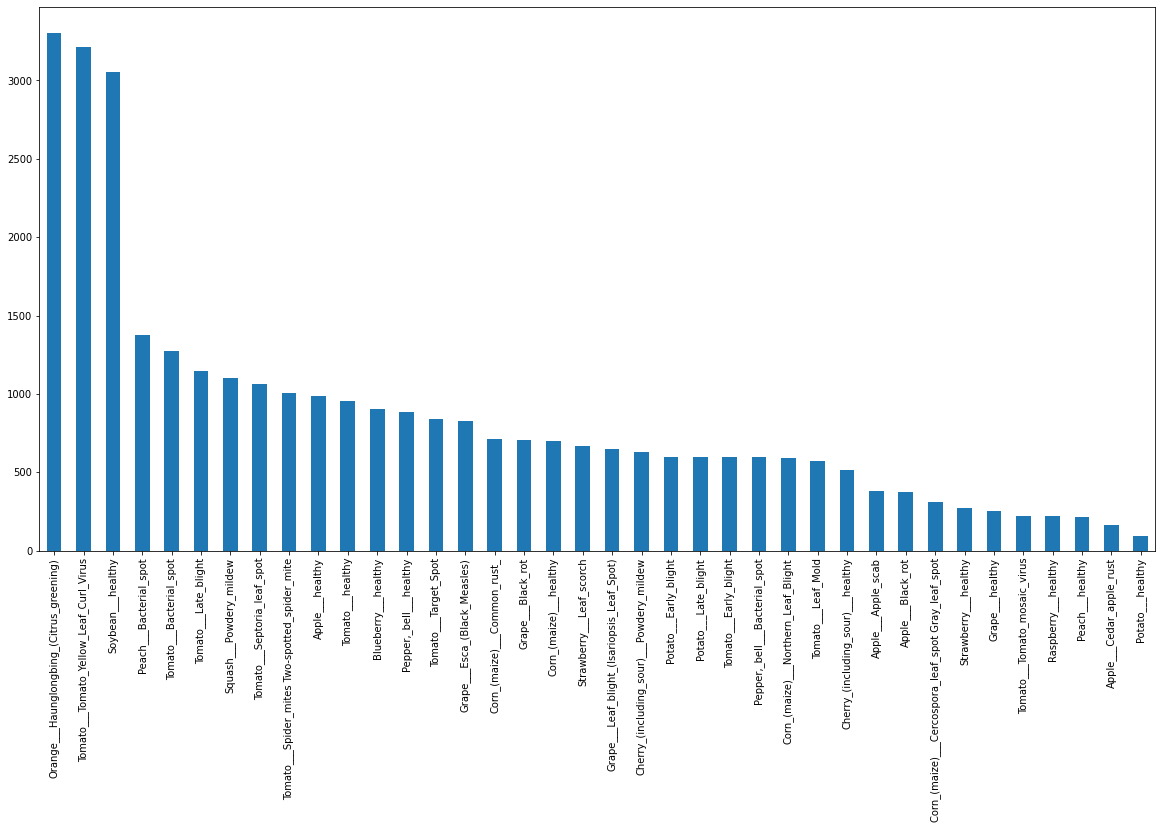

In [17]:
# How many images are there of each catagory?
train_pics["Labels"].value_counts().plot.bar(figsize=(20, 10));

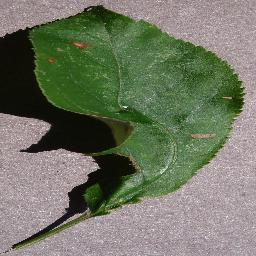

In [18]:
from IPython.display import display, Image
Image("drive/MyDrive/plants_disease_dataset/train/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG")

In [21]:
from collections import Counter
newData = Counter(train_pics["Labels"])
most_pics = newData.most_common(15)

print("The 15 most frequently found fruits in the data set and their number")
most_pics

The 15 most frequently found fruits in the data set and their number


[('Orange___Haunglongbing_(Citrus_greening)', 3304),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 3214),
 ('Soybean___healthy', 3054),
 ('Peach___Bacterial_spot', 1378),
 ('Tomato___Bacterial_spot', 1276),
 ('Tomato___Late_blight', 1145),
 ('Squash___Powdery_mildew', 1101),
 ('Tomato___Septoria_leaf_spot', 1062),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 1005),
 ('Apple___healthy', 987),
 ('Tomato___healthy', 954),
 ('Blueberry___healthy', 901),
 ('Pepper,_bell___healthy', 886),
 ('Tomato___Target_Spot', 842),
 ('Grape___Esca_(Black_Measles)', 829)]

In [22]:
x,y = zip(*most_pics)
x,y = list(x),list(y)

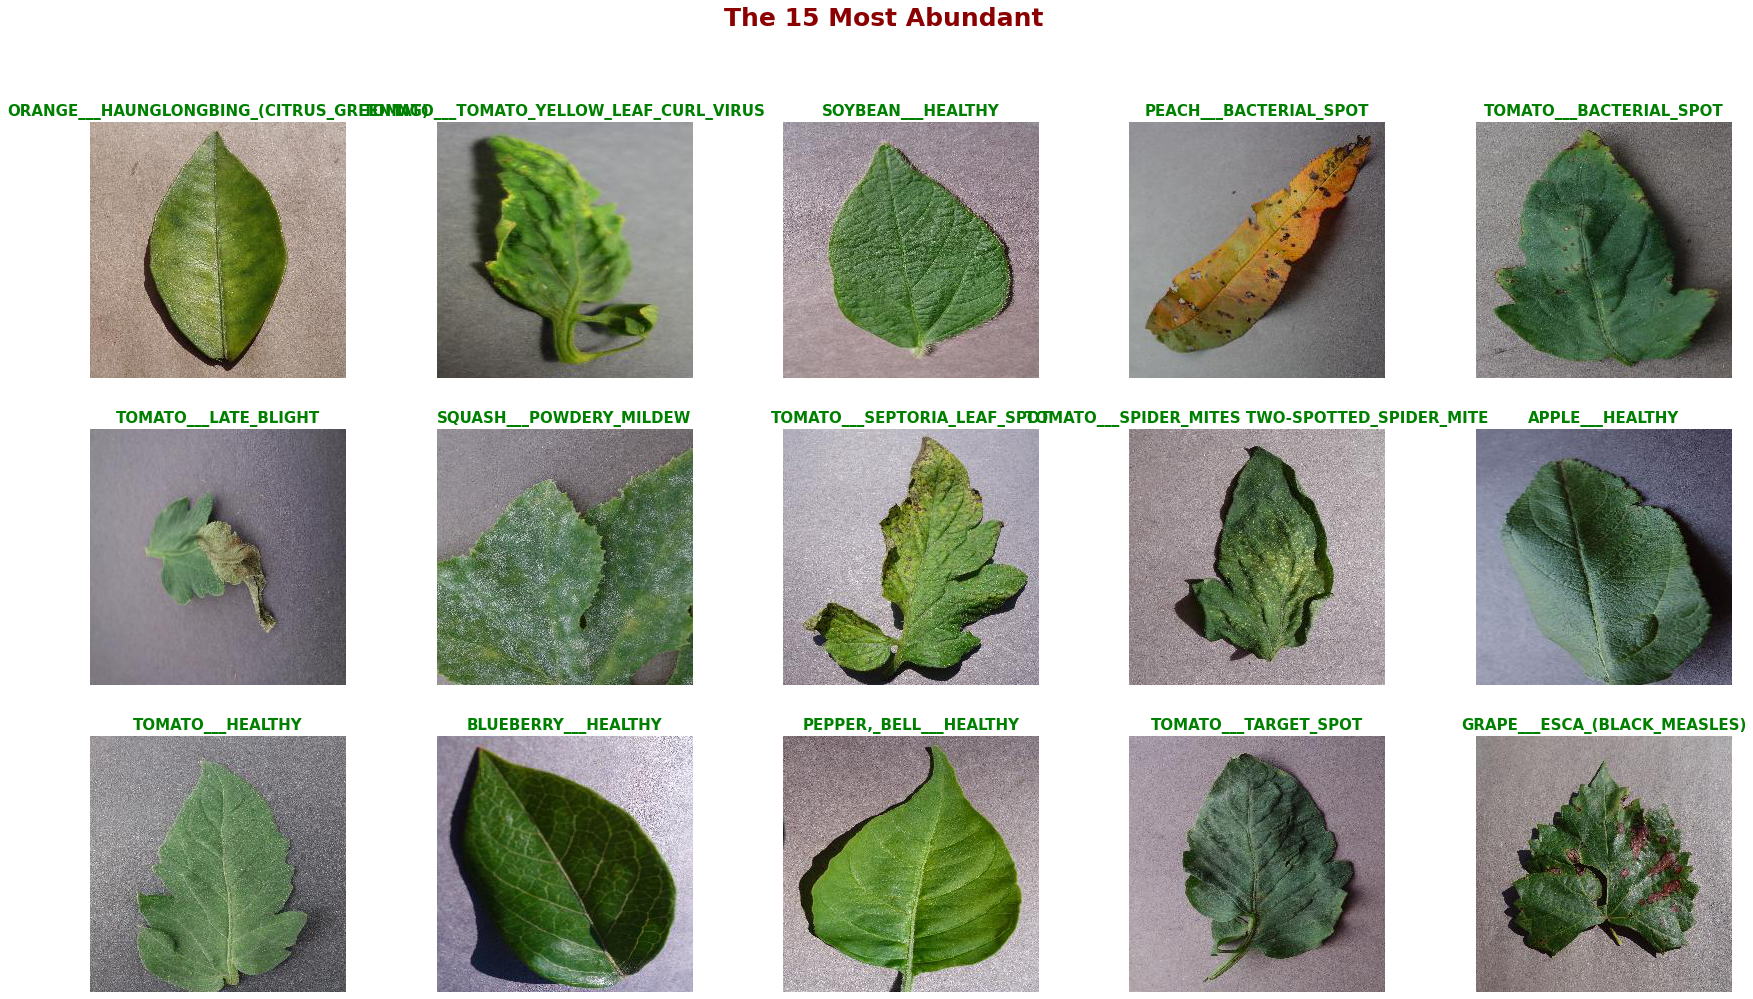

In [36]:
plt.figure(figsize=(30,16))
how_many_pics = len(x)

for i in range(how_many_pics):
    names = train_pics[train_pics["Labels"] == x[i]]["Images"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_data_directory + names)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Abundant", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

In [47]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rescale=1./255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
train_generator = datagen.flow_from_directory(train_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical', 
                                                    batch_size=batch_size)
val_generator = datagen.flow_from_directory(val_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical', 
                                                    batch_size=batch_size)

Found 32571 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [48]:
print(train_generator.class_indices)

unique_labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('drive/MyDrive/labels/plant_disease_labels.txt','w') as f:
  f.write(unique_labels)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [226]:
test_generator = datagen.flow_from_directory(test_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical',shuffle=False, 
                                                    batch_size=1)

Found 10885 images belonging to 38 classes.


In [50]:
INPUT_SHAPE = [None, img_height, img_width, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = train_generator.num_classes

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/4"

In [51]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [52]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              4254889   
_________________________________________________________________
dense (Dense)                (None, 38)                38076     
Total params: 4,292,965
Trainable params: 38,076
Non-trainable params: 4,254,889
_________________________________________________________________


In [53]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [54]:
import datetime
import os
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Data/plant_disease_logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [55]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=2)

In [56]:
NUM_EPOCHS = 5 #@param {type:"slider", min:5, max:100, step:5}

In [57]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_generator,
            epochs=NUM_EPOCHS,
            validation_data=val_generator,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [58]:
#Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/4
Epoch 1/5
1018/1018 [==============================] - 512s 473ms/step - loss: 0.5792 - accuracy: 0.8408 - val_loss: 0.2660 - val_accuracy: 0.9181
Epoch 2/5
1018/1018 [==============================] - 474s 465ms/step - loss: 0.2721 - accuracy: 0.9178 - val_loss: 0.2749 - val_accuracy: 0.9217
Epoch 3/5
1018/1018 [==============================] - 493s 484ms/step - loss: 0.2394 - accuracy: 0.9305 - val_loss: 0.3080 - val_accuracy: 0.9185
Epoch 4/5
1018/1018 [==============================] - 495s 486ms/step - loss: 0.2241 - accuracy: 0.9352 - val_loss: 0.2363 - val_accuracy: 0.9341
Epoch 5/5
1018/1018 [==============================] - 468s 460ms/step - loss: 0.2034 - accuracy: 0.9415 - val_loss: 0.2839 - val_accuracy: 0.9287


In [71]:
test_loss, test_acc = model.evaluate(test_generator)

10885/10885 [==============================] - 153s 14ms/step - loss: 0.3023 - accuracy: 0.9215


In [75]:
test_labels = test_generator.classes

In [180]:
Y_pred = model.predict(test_generator)
Y_pred = np.argmax(Y_pred, axis=1)
test_labels = test_generator.classes

In [181]:
class_names = os.listdir(train_data_directory)

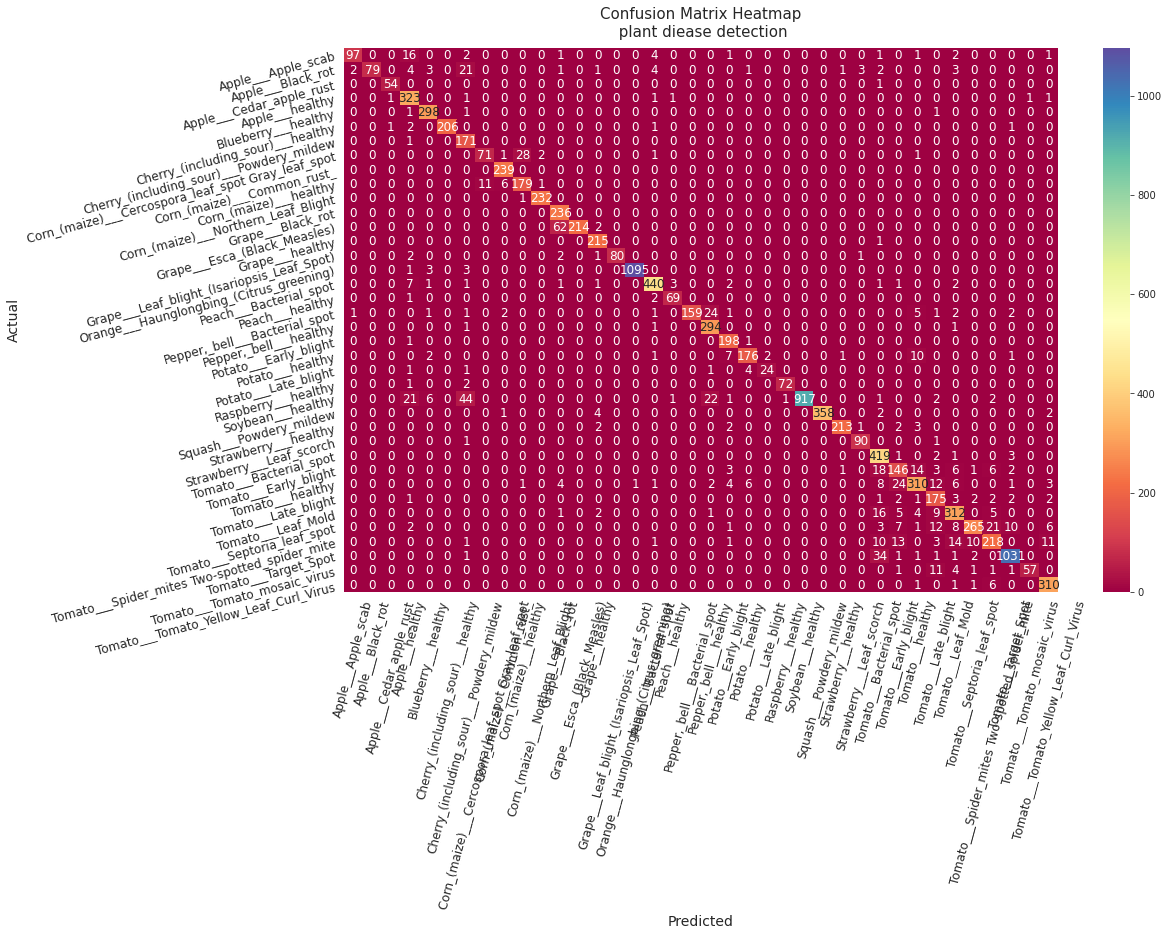

In [182]:
conf_mat = confusion_matrix(test_labels,Y_pred)
sns.set_style(style='dark')
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":12},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap\n plant diease detection', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(class_names, fontdict={'fontsize':12,'rotation': 75})
heatmap.set_yticklabels(class_names, fontdict={'fontsize':12,'rotation': 15})
plt.show()

In [170]:
predictions = model.predict(test_generator)

In [183]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_labels[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[79])
pred_label

'Apple___Apple_scab'

In [184]:
import matplotlib.image as mpimg
filenames_n = ['drive/MyDrive/plants_disease_dataset/test/' + fname for fname in test_generator.filenames]

In [235]:
labels = test_generator.classes
true_labels = [unique_labels[i] for i in labels]


In [185]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(mpimg.imread(image))
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

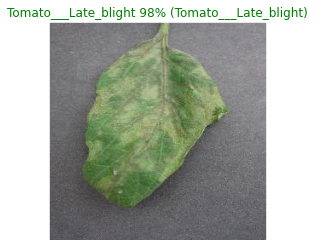

In [233]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=true_labels,
          images=filenames_n, n = 8000)

In [243]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  # top_10_pred_labels = map(unique_labels.__getitem__, top_10_pred_indexes)
  # top_10_pred_labels = unique_labels[top_10_pred_indexes]
  top_10_pred_labels= [unique_labels[i] for i in top_10_pred_indexes]
  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

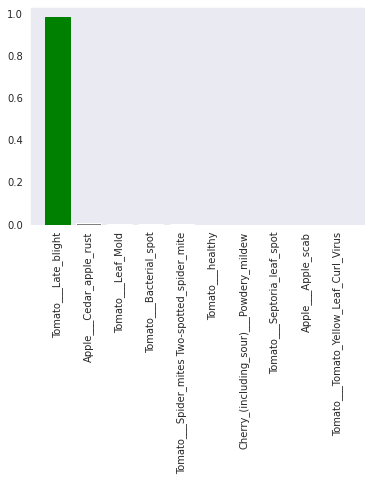

In [244]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=true_labels,
               n=8000)

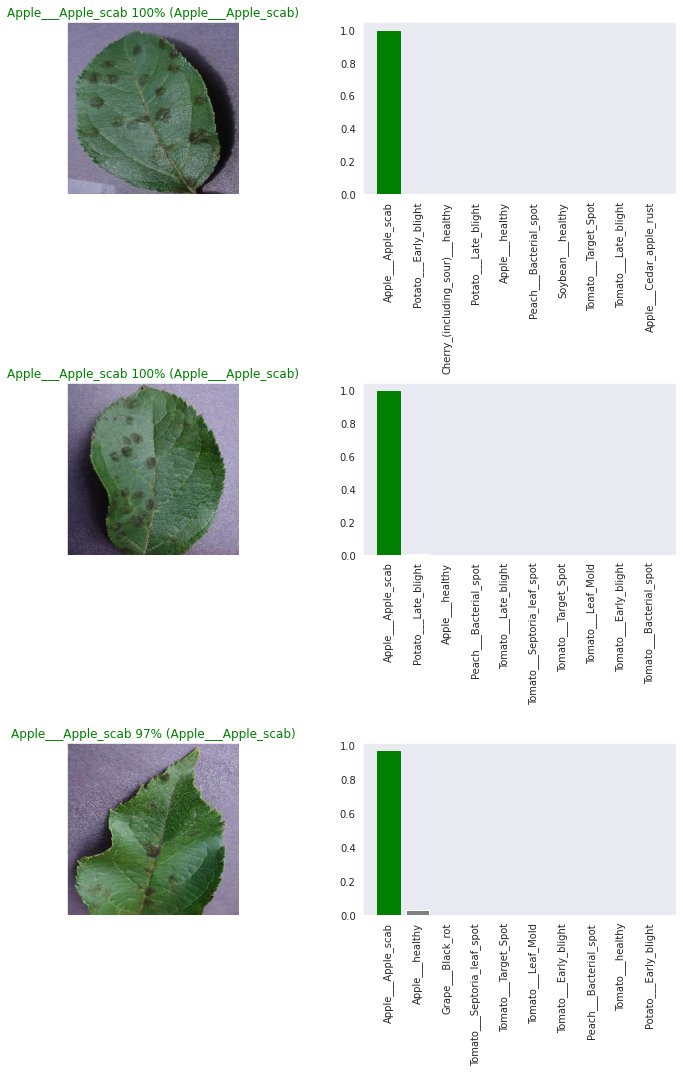

In [250]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=true_labels,
            images=filenames_n,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=true_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [229]:
saved_model_dir = ''
tf.saved_model.save(model,saved_model_dir)

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('drive/MyDrive/tflite_models/model.tflite', 'wb') as f:
  f.write(tflite_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [230]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/tf_models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [231]:
# Save our model trained on whole images
save_model(model, suffix="plant-disease-detection-mobilenetv1-Adam")

Saving model to: drive/MyDrive/tf_models/20210527-23091622156975-plant-disease-detection-mobilenetv1-Adam.h5...


'drive/MyDrive/tf_models/20210527-23091622156975-plant-disease-detection-mobilenetv1-Adam.h5'

In [236]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [237]:
model = load_model('/content/drive/MyDrive/tf_models/20210527-23091622156975-plant-disease-detection-mobilenetv1-Adam.h5')

Loading saved model from: /content/drive/MyDrive/tf_models/20210527-23091622156975-plant-disease-detection-mobilenetv1-Adam.h5


In [238]:
unique_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


Apple___Cedar_apple_rust


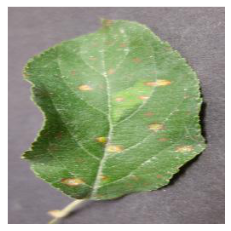

In [239]:
import os
from keras.preprocessing import image

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # image path
    img_path = '/content/drive/MyDrive/plants_disease_dataset/test/Apple___Cedar_apple_rust/e733b839-3fac-4c4e-ac1c-38fa89c1e739___FREC_C.Rust 3546.JPG'
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat
    # load a single image
    new_image = load_image(img_path)
    import matplotlib.image as mpimg
    plt.imshow(mpimg.imread(img_path))
    plt.xticks([])
    plt.yticks([])
    # check prediction
    pred = model.predict(new_image)
    print(unique_labels[pred.argmax()])